In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./imdb_anime.csv")

FileNotFoundError: [Errno 2] No such file or directory: './imdb_anime.csv'

In [ ]:
df = df.drop(840)

Чистим от NaN, чтобы все фильтры работали

In [ ]:
df[df["Runtime"].isnull() == True] = "0 min"

In [ ]:
df["Runtime"] = df["Runtime"].apply(lambda x: x.replace("min", "").replace(" ", "").replace(",", ""))

In [ ]:
df["Runtime"].unique()

array(['24', '99', '92', '102', '20', '100', '25', '124', '110', '125',
       '91', '23', '119', '81', '130', '0', '108', '115', '95', '45',
       '105', '106', '96', '87', '93', '98', '83', '84', '89', '90', '97',
       '103', '134', '88', '122', '118', '101', '85', '86', '78', '104',
       '112', '126', '325', '117', '264', '22', '82', '75', '77', '30',
       '94', '316', '121', '111', '63', '51', '50', '10', '137', '79',
       '46', '113', '154', '80', '109', '69', '26', '151', '76', '116',
       '165', '21', '47', '12', '300', '71', '120', '140', '68', '360',
       '16', '73', '107', '15', '114', '4', '129', '384', '40', '54',
       '132', '72', '27', '74', '29', '253', '53', '135', '8', '48',
       '128', '275', '55', '52', '138', '14', '288', '57', '70', '701',
       '162', '60', '3', '180', '34', '64', '28', '13', '17', '5', '210',
       '167', '41', '9', '155', '59', '7', '56', '160', '195', '136',
       '38', '131', '2', '43', '420', '42', '65', '18', '36', '58', 

In [ ]:
df["Runtime"] = df["Runtime"].astype(int)

In [ ]:
df["Runtime"].info()

<class 'pandas.core.series.Series'>
Index: 45716 entries, 0 to 45716
Series name: Runtime
Non-Null Count  Dtype
--------------  -----
45716 non-null  int32
dtypes: int32(1)
memory usage: 535.7 KB


Фильтр по количественному полю 

In [ ]:
sorted = df[(df["Runtime"] > 13) & (df["Runtime"] < 28)]
print("Уникальные значения: ")
print(sorted["Runtime"].unique())
print("Количество дубликатов: ")
print(sorted["Runtime"].value_counts())

Уникальные значения: 
[24 20 25 23 22 26 21 16 15 27 14 17 18 19]
Количество дубликатов: 
Runtime
24    9636
25    5899
23    4773
22    1795
21     549
26     409
20     331
15     162
27     146
19      79
14      62
16      43
18      33
17      24
Name: count, dtype: int64


График количества значений - ?

<Axes: xlabel='Runtime'>

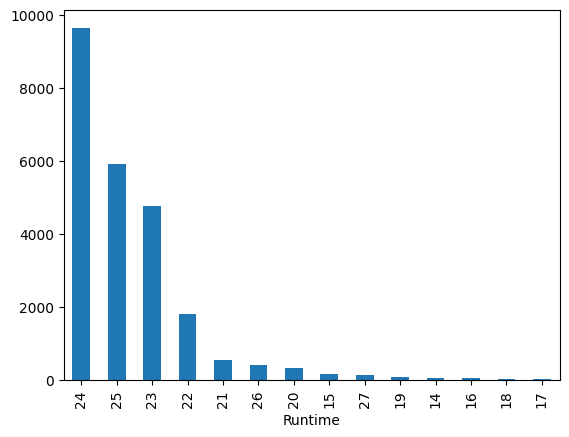

In [ ]:
sorted["Runtime"].value_counts().plot.bar()

Перекрёснтная выборка

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Выберем только числовые столбцы для анализа
numeric_columns = ['User Rating', 'Number of Votes', 'Runtime', 'Metascore', 'Gross']

for col in numeric_columns:
    sorted[col] = sorted[col].astype(str)
    sorted[col] = sorted[col].apply(lambda x: x.replace(",", "").replace(" ", "").replace("nan", "0"))
    sorted[col] = sorted[col].astype(float)

# Создадим перекрестную выборку с агрегированными значениями
cross_data = sorted[numeric_columns].agg(['min', 'max', 'mean', 'median'])

# Выведем перекрестную выборку
cross_data

C:\Users\gff10\AppData\Local\Temp\ipykernel_840\241468870.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorted[col] = sorted[col].astype(str)
C:\Users\gff10\AppData\Local\Temp\ipykernel_840\241468870.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorted[col] = sorted[col].apply(lambda x: x.replace(",", "").replace(" ", "").replace("nan", "0"))
C:\Users\gff10\AppData\Local\Temp\ipykernel_840\241468870.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

,User Rating,Number of Votes,Runtime,Metascore,Gross
min,0.000000,0.000000,14.000000,0.0,0.000000
max,9.900000,434457.000000,27.000000,0.0,434457.000000
mean,4.736026,780.544004,23.692494,0.0,780.544004
median,6.800000,17.000000,24.000000,0.0,17.000000
